# RIO-125: Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset Batch 01

#### importing all the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Norka\intenship-2\Dataset\phone_dataset.csv")

In [3]:
data

,brand,model,2G_bands,3G_bands,4G_bands,weight_g,SIM,display_size(inches),Pixel_height,Pixel_width,...,RAM(GB),primary_camera(MP),secondary_camera(MP),audio_jack,WIFI,bluetooth,GPS,radio,Battery(Mah),Aprox Price INR
0,Acer,Iconia Talk S,Yes,Yes,Yes,260.0,Dual,7,720.0,1280,...,2.0,13.00,2.0,Yes,Yes,Yes,Yes,Yes,3400,13600
1,Acer,Liquid Z6 Plus,Yes,Yes,Yes,169.0,Single,5.5,1080.0,1920,...,3.0,13.00,5.0,Yes,Yes,Yes,Yes,Yes,4080,20000
2,Acer,Liquid Z6,Yes,Yes,Yes,190.0,Single,5,720.0,1280,...,1.0,8.00,2.0,Yes,Yes,Yes,Yes,Yes,145,9600
3,Acer,Iconia Tab 10 A3-A40,N/A,No,No,110.0,No,10.1,1920.0,120,...,2.0,5.00,2.0,Yes,Yes,Yes,No,No,1000,18400
4,Acer,Liquid X2,Yes,Yes,Yes,166.0,Triple,5.5,720.0,1280,...,3.0,13.00,13.0,Yes,Yes,Yes,Yes,Yes,4020,18400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,ZTE,F600,Yes,Yes,No,90.0,Mini,2.4,240.0,320,...,0.0,3.15,1.0,No,No,Yes,No,Yes,800,4266
8627,ZTE,F103,Yes,Yes,No,90.0,Mini,2,176.0,220,...,0.0,2.00,1.0,No,No,Yes,No,Yes,1000,5333
8628,ZTE,F101,Yes,Yes,No,90.0,Mini,2,176.0,220,...,0.0,2.00,1.0,No,No,Yes,No,Yes,1000,5333
8629,ZTE,F100,Yes,Yes,No,90.0,Mini,2,176.0,220,...,0.0,2.00,1.0,No,No,Yes,No,Yes,1000,5333


In [4]:
data.head()

,brand,model,2G_bands,3G_bands,4G_bands,weight_g,SIM,display_size(inches),Pixel_height,Pixel_width,...,RAM(GB),primary_camera(MP),secondary_camera(MP),audio_jack,WIFI,bluetooth,GPS,radio,Battery(Mah),Aprox Price INR
0,Acer,Iconia Talk S,Yes,Yes,Yes,260.0,Dual,7,720.0,1280,...,2.0,13.0,2.0,Yes,Yes,Yes,Yes,Yes,3400,13600
1,Acer,Liquid Z6 Plus,Yes,Yes,Yes,169.0,Single,5.5,1080.0,1920,...,3.0,13.0,5.0,Yes,Yes,Yes,Yes,Yes,4080,20000
2,Acer,Liquid Z6,Yes,Yes,Yes,190.0,Single,5,720.0,1280,...,1.0,8.0,2.0,Yes,Yes,Yes,Yes,Yes,145,9600
3,Acer,Iconia Tab 10 A3-A40,N/A,No,No,110.0,No,10.1,1920.0,120,...,2.0,5.0,2.0,Yes,Yes,Yes,No,No,1000,18400
4,Acer,Liquid X2,Yes,Yes,Yes,166.0,Triple,5.5,720.0,1280,...,3.0,13.0,13.0,Yes,Yes,Yes,Yes,Yes,4020,18400


In [5]:
data.shape

(8631, 23)

In [6]:
data.describe()

,weight_g,Pixel_height,Pixel_width,CPU(core),internal_memory(GB),RAM(GB),primary_camera(MP),secondary_camera(MP),Battery(Mah),Aprox Price INR
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8.631000e+03
mean,137.255561,424.843033,658.990384,2.248639,12.651177,21.618063,4.388273,1.335147,1475.939868,1.201890e+04
std,90.404437,340.637469,574.851907,2.017261,18.059369,85.689665,7.792104,2.327645,1292.704105,3.572122e+04
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,6.130000e+02
25%,95.000000,176.000000,220.000000,1.000000,1.000000,0.000000,1.000000,0.000000,780.000000,4.800000e+03
50%,112.000000,320.000000,400.000000,1.000000,4.000000,1.000000,3.150000,0.000000,1000.000000,8.000000e+03
75%,147.000000,540.000000,960.000000,4.000000,16.000000,2.000000,5.000000,1.300000,1925.000000,1.360000e+04
max,2005.000000,3840.000000,3840.000000,10.000000,96.000000,768.000000,600.000000,20.000000,11560.000000,2.160000e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 8631 non-null   object 
 1   model                 8631 non-null   object 
 2   2G_bands              8631 non-null   object 
 3   3G_bands              8631 non-null   object 
 4   4G_bands              8631 non-null   object 
 5   weight_g              8631 non-null   float64
 6   SIM                   8631 non-null   object 
 7   display_size(inches)  7418 non-null   object 
 8   Pixel_height          8631 non-null   float64
 9   Pixel_width           8631 non-null   int64  
 10  OS                    8631 non-null   object 
 11  CPU(core)             8631 non-null   int64  
 12  internal_memory(GB)   8631 non-null   float64
 13  RAM(GB)               8631 non-null   float64
 14  primary_camera(MP)    8631 non-null   float64
 15  secondary_camera(MP) 

In [8]:
data.dtypes

brand                    object
model                    object
2G_bands                 object
3G_bands                 object
4G_bands                 object
weight_g                float64
SIM                      object
display_size(inches)     object
Pixel_height            float64
Pixel_width               int64
OS                       object
CPU(core)                 int64
internal_memory(GB)     float64
RAM(GB)                 float64
primary_camera(MP)      float64
secondary_camera(MP)    float64
audio_jack               object
WIFI                     object
bluetooth                object
GPS                      object
radio                    object
Battery(Mah)              int64
Aprox Price INR           int64
dtype: object

In [9]:
data.nunique()

brand                    108
model                   8273
2G_bands                   3
3G_bands                   2
4G_bands                   2
weight_g                 890
SIM                       12
display_size(inches)     186
Pixel_height              79
Pixel_width              109
OS                        42
CPU(core)                  6
internal_memory(GB)      132
RAM(GB)                   34
primary_camera(MP)        49
secondary_camera(MP)      26
audio_jack                 3
WIFI                       2
bluetooth                  2
GPS                        2
radio                      2
Battery(Mah)             369
Aprox Price INR          294
dtype: int64

In [10]:
data.isnull()

,brand,model,2G_bands,3G_bands,4G_bands,weight_g,SIM,display_size(inches),Pixel_height,Pixel_width,...,RAM(GB),primary_camera(MP),secondary_camera(MP),audio_jack,WIFI,bluetooth,GPS,radio,Battery(Mah),Aprox Price INR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8629,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

brand                      0
model                      0
2G_bands                   0
3G_bands                   0
4G_bands                   0
weight_g                   0
SIM                        0
display_size(inches)    1213
Pixel_height               0
Pixel_width                0
OS                         0
CPU(core)                  0
internal_memory(GB)        0
RAM(GB)                    0
primary_camera(MP)         0
secondary_camera(MP)       0
audio_jack                 0
WIFI                       0
bluetooth                  0
GPS                        0
radio                      0
Battery(Mah)               0
Aprox Price INR            0
dtype: int64

In [12]:
data=data.dropna()

In [13]:
data.shape

(7418, 23)

In [14]:
data[['brand','model','2G_bands','3G_bands','weight_g','SIM','display_size(inches)','Pixel_height','Pixel_width','OS','CPU(core)','internal_memory(GB)','RAM(GB)','primary_camera(MP)','secondary_camera(MP)','audio_jack','WIFI','bluetooth','GPS','radio','Battery(Mah)','Aprox Price INR']]= data[['brand','model','2G_bands','3G_bands','weight_g','SIM','display_size(inches)','Pixel_height','Pixel_width','OS','CPU(core)','internal_memory(GB)','RAM(GB)','primary_camera(MP)','secondary_camera(MP)','audio_jack','WIFI','bluetooth','GPS','radio','Battery(Mah)','Aprox Price INR']].replace(0,np.NaN)     

C:\Users\91799\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
data.isnull().sum()

brand                      0
model                      0
2G_bands                   0
3G_bands                   0
4G_bands                   0
weight_g                   0
SIM                        0
display_size(inches)       0
Pixel_height               0
Pixel_width                0
OS                         0
CPU(core)                  0
internal_memory(GB)     1044
RAM(GB)                 2774
primary_camera(MP)       506
secondary_camera(MP)    3311
audio_jack                 0
WIFI                       0
bluetooth                  0
GPS                        0
radio                      0
Battery(Mah)               0
Aprox Price INR            0
dtype: int64

In [16]:
data['internal_memory(GB)'].fillna(data['internal_memory(GB)'].mean(),inplace=True)
data['primary_camera(MP)'].fillna(data['primary_camera(MP)'].mean(),inplace=True)
data['secondary_camera(MP)'].fillna(data['secondary_camera(MP)'].mean(),inplace=True)
data['RAM(GB)'].fillna(data['RAM(GB)'].mean(),inplace=True)

C:\Users\91799\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
data.isnull().sum()

brand                   0
model                   0
2G_bands                0
3G_bands                0
4G_bands                0
weight_g                0
SIM                     0
display_size(inches)    0
Pixel_height            0
Pixel_width             0
OS                      0
CPU(core)               0
internal_memory(GB)     0
RAM(GB)                 0
primary_camera(MP)      0
secondary_camera(MP)    0
audio_jack              0
WIFI                    0
bluetooth               0
GPS                     0
radio                   0
Battery(Mah)            0
Aprox Price INR         0
dtype: int64

In [21]:
data.shape

(7418, 23)

### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'weight_g'}>,
        <AxesSubplot:title={'center':'Pixel_height'}>,
        <AxesSubplot:title={'center':'Pixel_width'}>],
       [<AxesSubplot:title={'center':'CPU(core)'}>,
        <AxesSubplot:title={'center':'internal_memory(GB)'}>,
        <AxesSubplot:title={'center':'RAM(GB)'}>],
       [<AxesSubplot:title={'center':'primary_camera(MP)'}>,
        <AxesSubplot:title={'center':'secondary_camera(MP)'}>,
        <AxesSubplot:title={'center':'Battery(Mah)'}>],
       [<AxesSubplot:title={'center':'Aprox Price INR'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

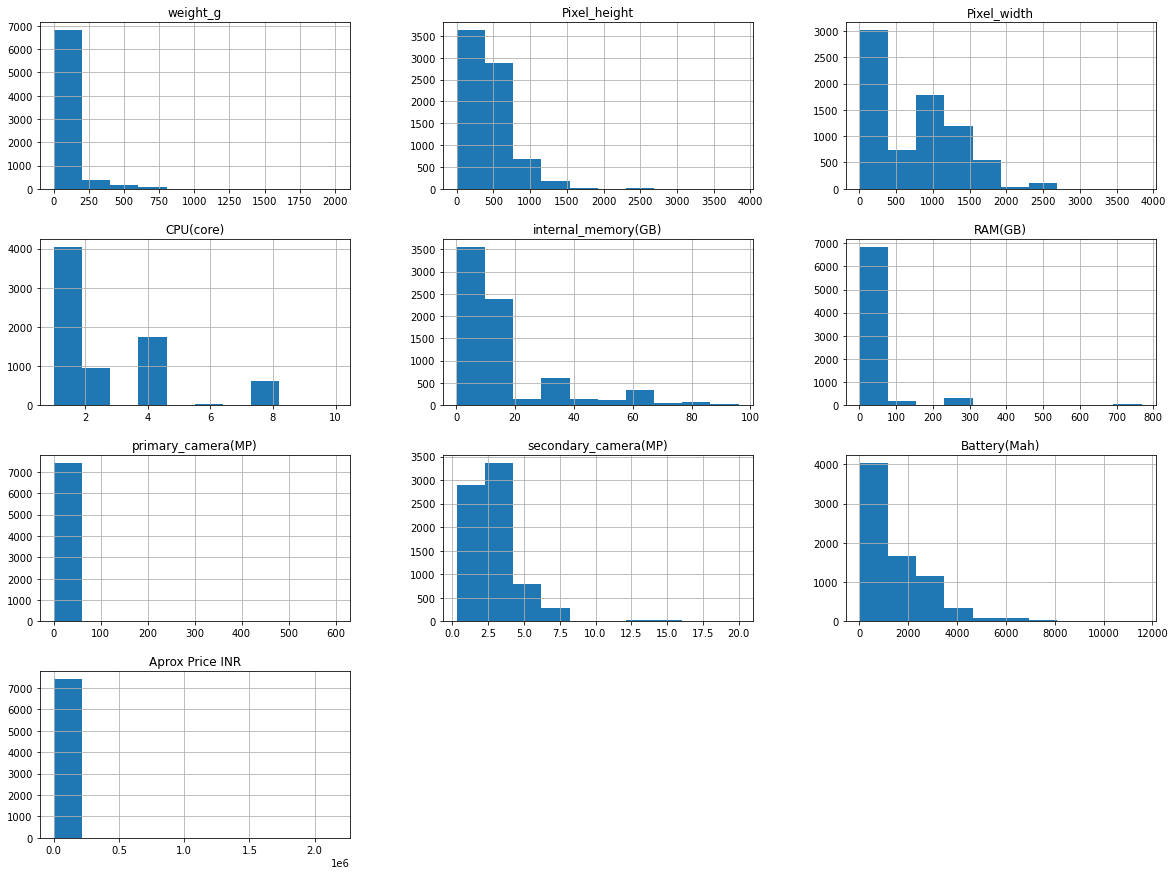

In [22]:
data.hist(bins=10,figsize=(20,15))

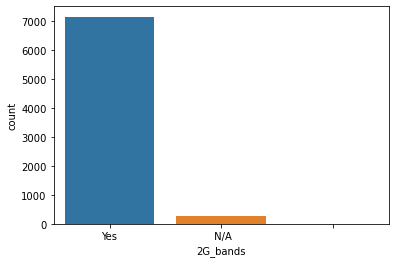

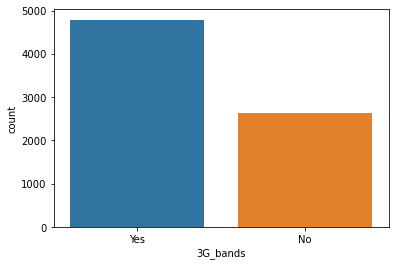

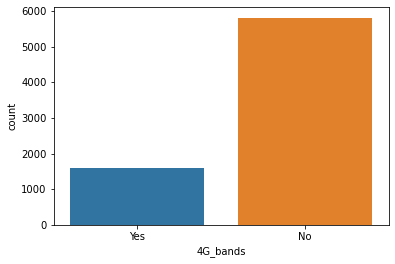

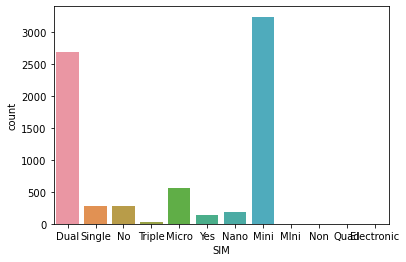

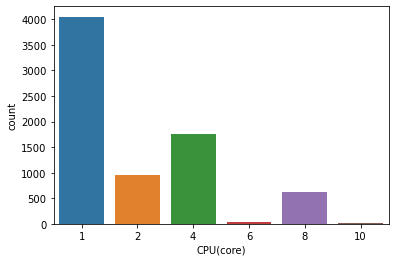

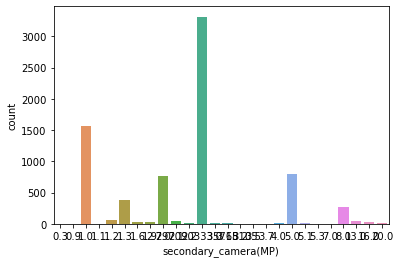

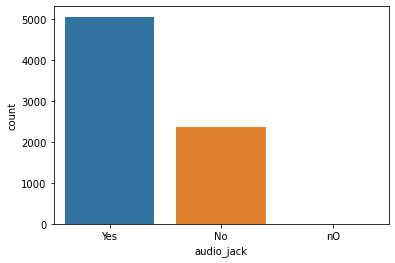

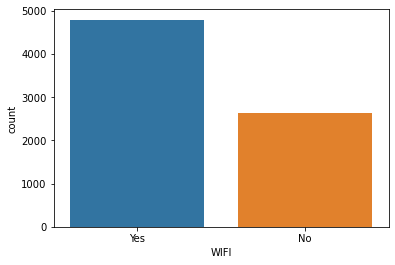

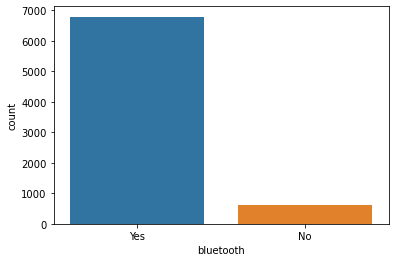

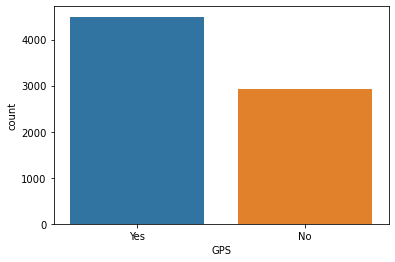

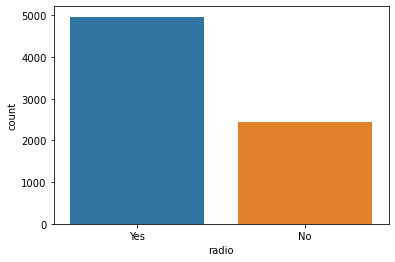

In [23]:
for i in data:
    if(data[i].nunique()<30):
        sns.countplot(x=data[i])
        plt.show()

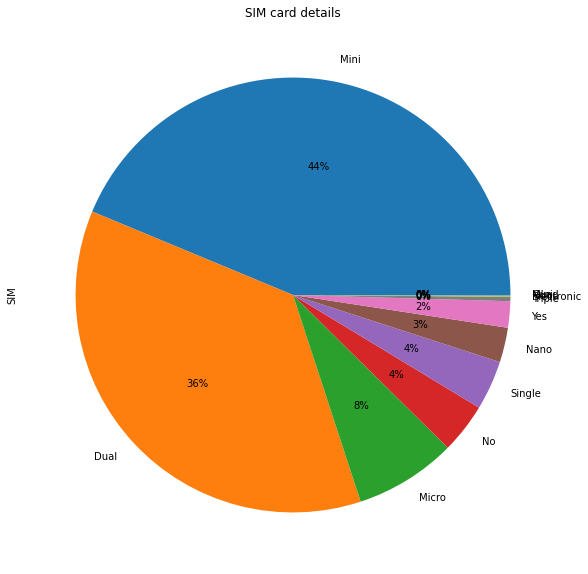

In [24]:
data["SIM"].value_counts().plot(kind='pie', title='SIM card details',figsize=(15,10),autopct='%.0f%%')
plt.show()

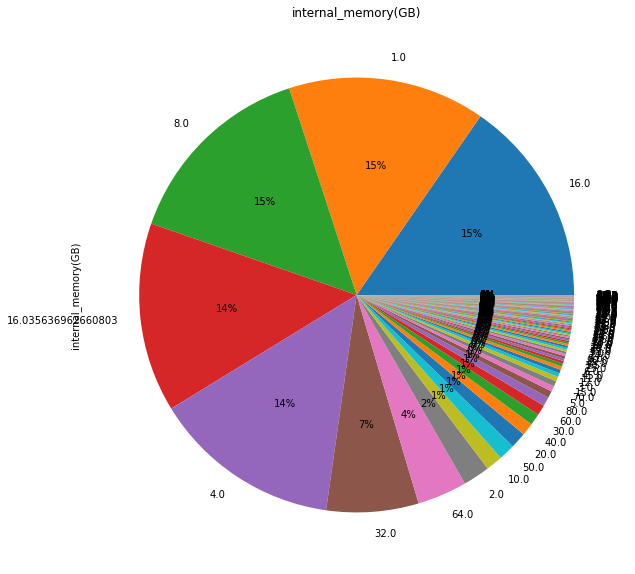

In [25]:
data["internal_memory(GB)"].value_counts().plot(kind='pie', title='internal_memory(GB)',figsize=(15,10),autopct='%.0f%%')
plt.show()

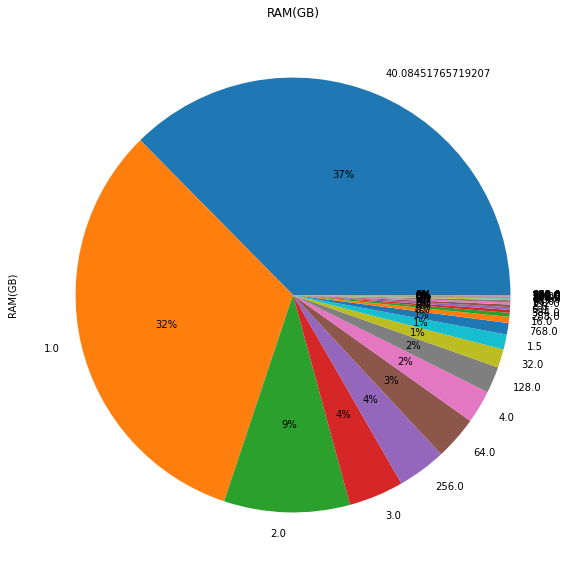

In [26]:
data["RAM(GB)"].value_counts().plot(kind='pie', title='RAM(GB)',figsize=(15,10),autopct='%.0f%%')
plt.show()

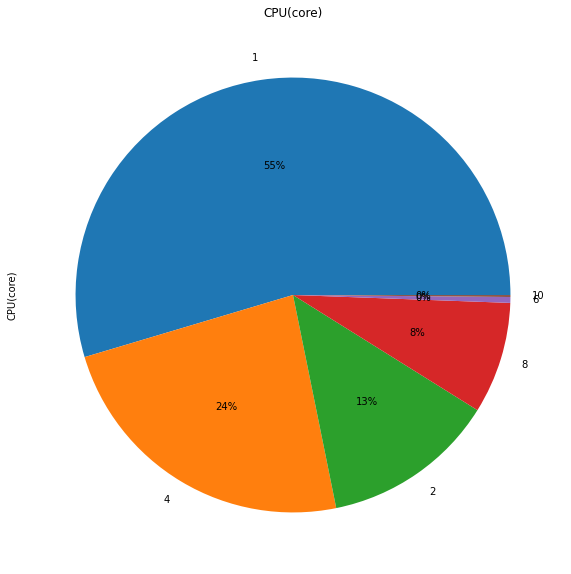

In [27]:
data["CPU(core)"].value_counts().plot(kind='pie', title='CPU(core)',figsize=(15,10),autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='CPU(core)', ylabel='brand'>

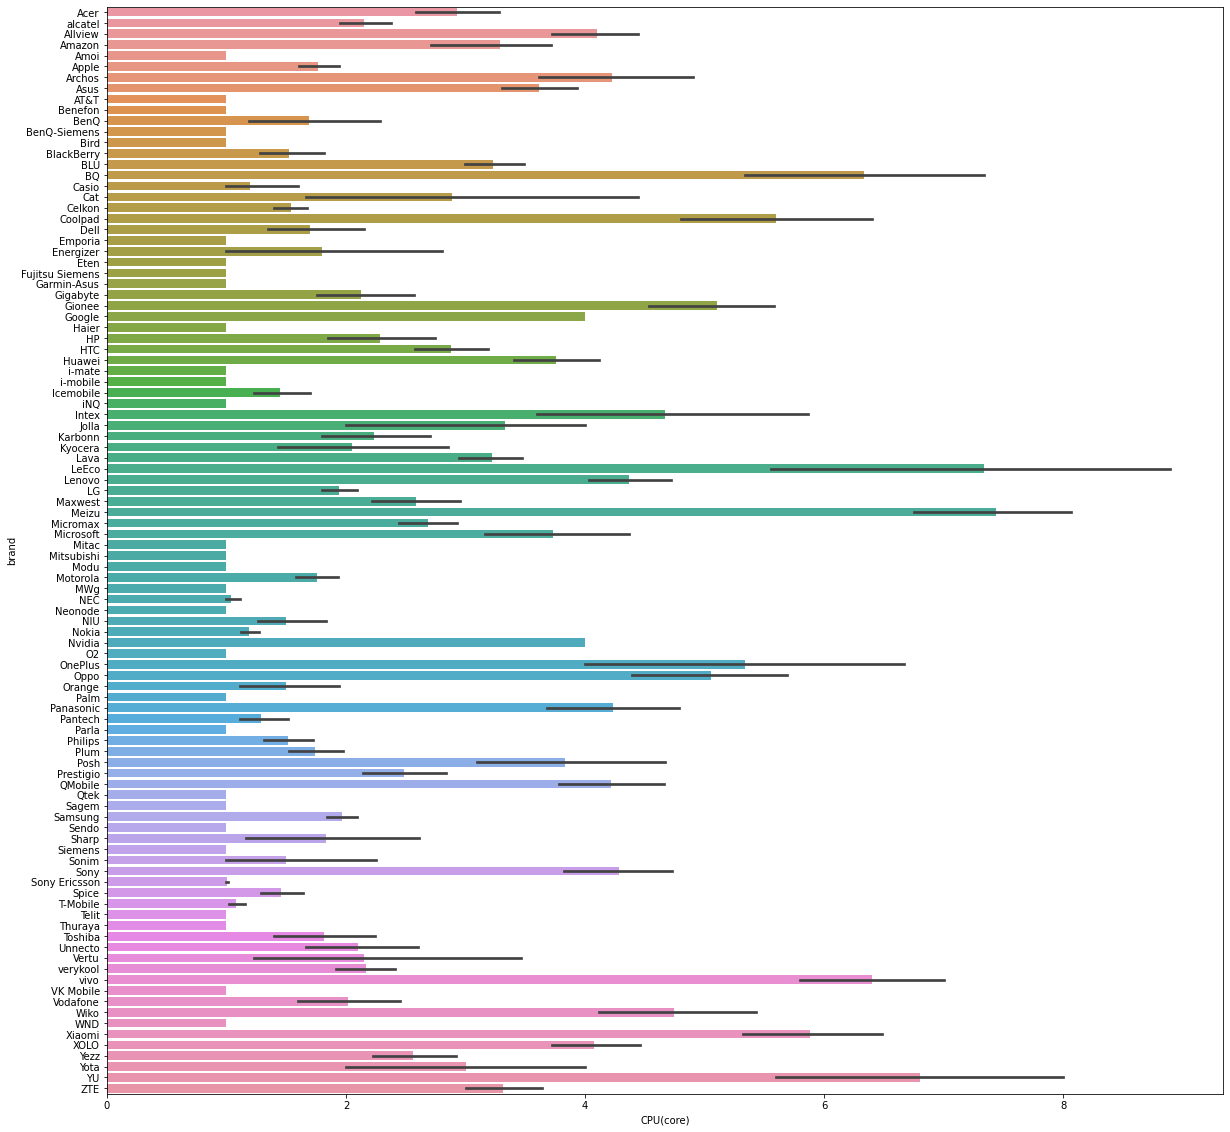

In [28]:
plt.figure(figsize=(20,20))
sns.barplot(x="CPU(core)", y="brand", data=data)

<AxesSubplot:xlabel='Aprox Price INR', ylabel='OS'>

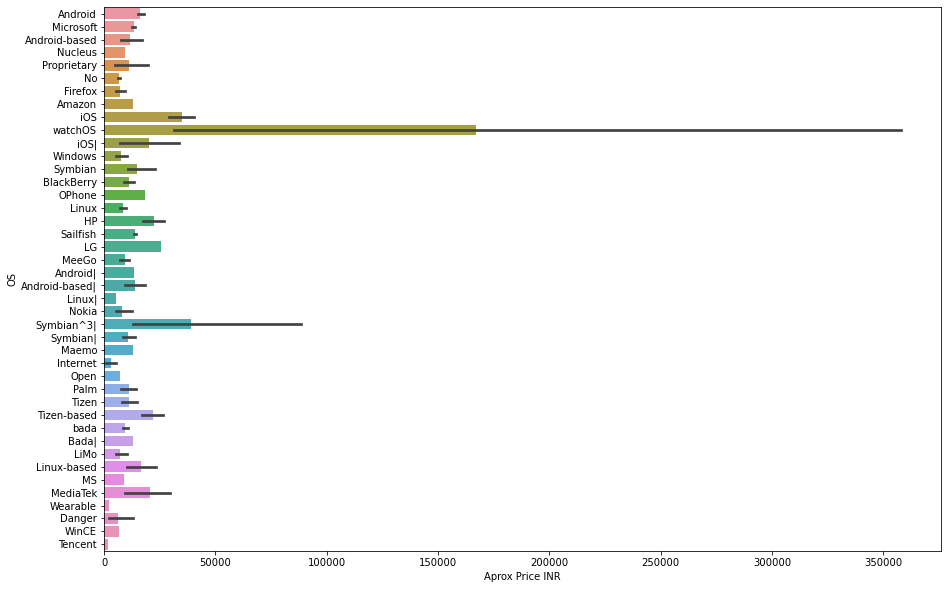

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(y="OS", x="Aprox Price INR", data=data)

<AxesSubplot:xlabel='Aprox Price INR', ylabel='SIM'>

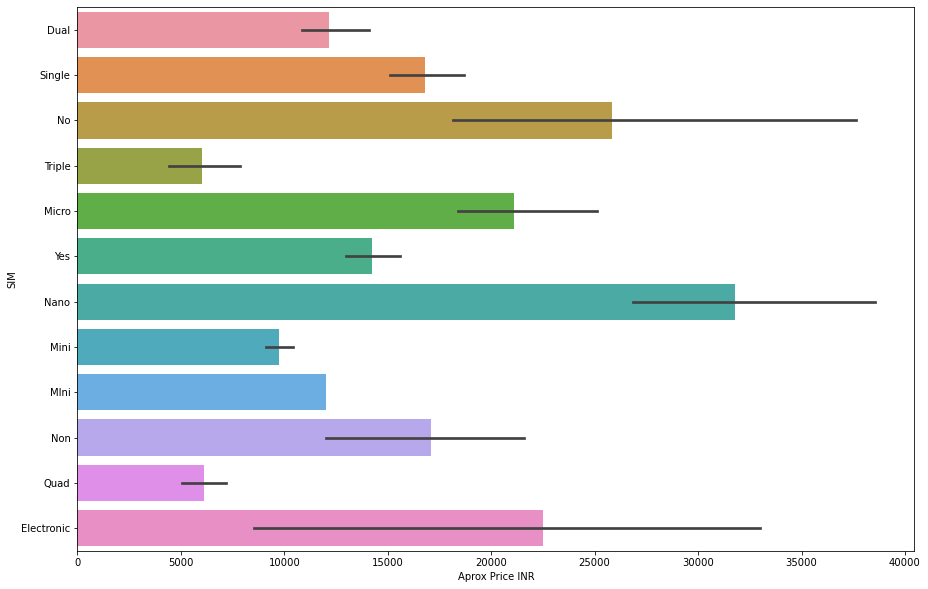

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(y="SIM", x="Aprox Price INR", data=data)

<AxesSubplot:xlabel='secondary_camera(MP)', ylabel='Aprox Price INR'>

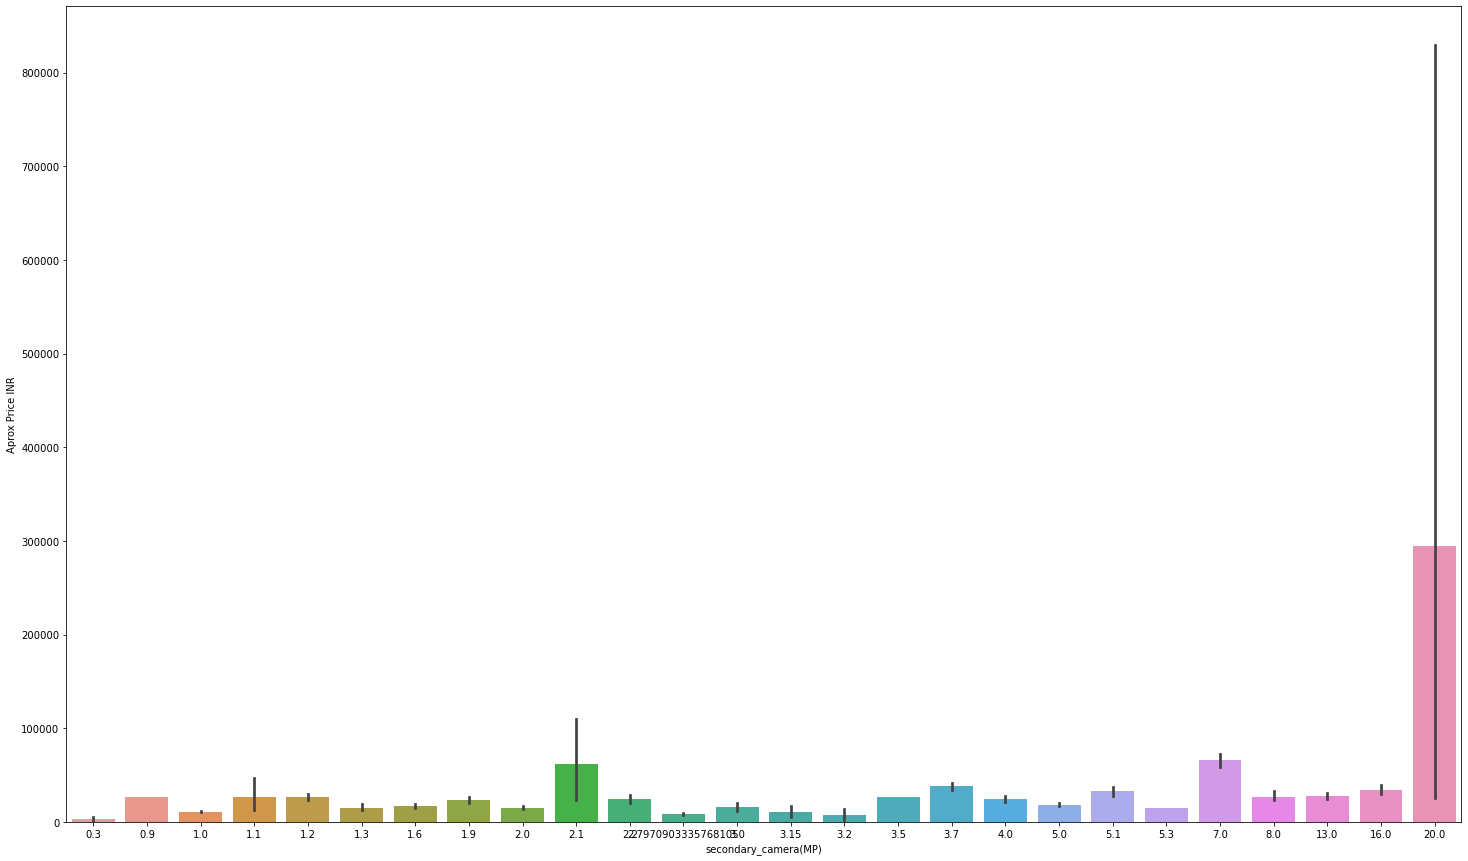

In [31]:
plt.figure(figsize=(25,15))
sns.barplot(x="secondary_camera(MP)", y="Aprox Price INR", data=data)

C:\Users\91799\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


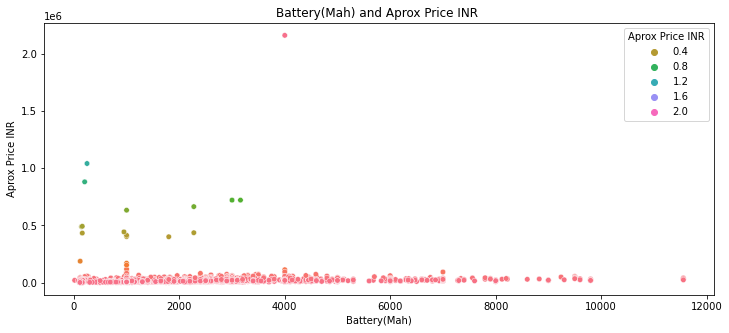

In [32]:
plt.figure(figsize=(12,5))
plt.title("Battery(Mah) and Aprox Price INR ")
sns.scatterplot(data["Battery(Mah)"],y=data["Aprox Price INR"],hue=data["Aprox Price INR"],s=30,palette="husl")
plt.show()

C:\Users\91799\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


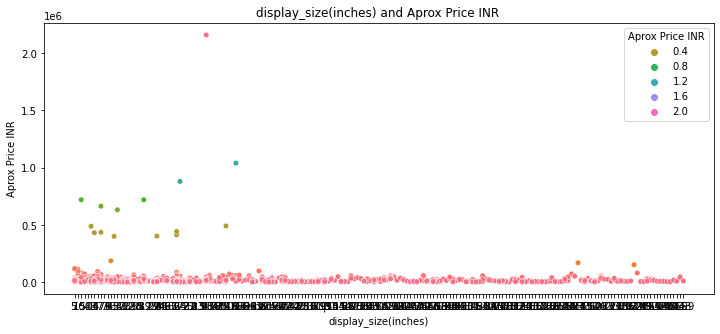

In [33]:
plt.figure(figsize=(12,5))
plt.title("display_size(inches) and Aprox Price INR ")
sns.scatterplot(data["display_size(inches)"],y=data["Aprox Price INR"],hue=data["Aprox Price INR"],s=30,palette="husl")
plt.show()

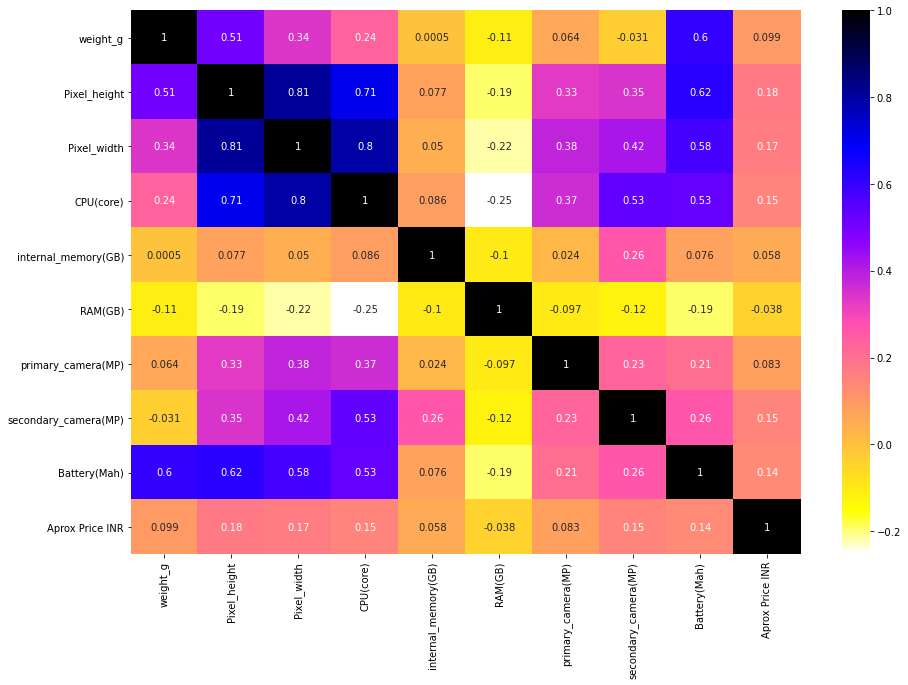

In [34]:
plt.figure(figsize= (15,10))
sns.heatmap(data.corr(), annot = True, cmap="gnuplot2_r")
plt.show()